In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,0.511774,0.682392,3.343755e-08,0.513896,0.633112,-0.026854,0.504620,0.589392,-0.048841,0.491820,...,0.448594,0.732010,-0.078533,0.474761,0.719788,-0.074623,0.473727,0.707685,-0.069912,you
4395,0.557625,0.700550,1.164729e-08,0.557155,0.640370,-0.026358,0.546251,0.593412,-0.049689,0.538340,...,0.497424,0.750283,-0.087359,0.523596,0.737459,-0.081628,0.523942,0.723670,-0.075355,you
4396,0.617593,0.728289,3.137894e-08,0.619501,0.669649,-0.038178,0.609197,0.620396,-0.068265,0.603869,...,0.565311,0.789991,-0.101362,0.592905,0.766879,-0.093530,0.587300,0.748086,-0.086288,you
4397,0.627589,0.732005,1.040103e-07,0.631498,0.672902,-0.043846,0.621830,0.628752,-0.076637,0.620314,...,0.577755,0.801246,-0.111861,0.608115,0.775224,-0.103700,0.604409,0.754520,-0.095120,you


In [37]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,0.511774,0.682392,3.343755e-08,0.513896,0.633112,-0.026854,0.504620,0.589392,-0.048841,0.491820,...,0.448594,0.732010,-0.078533,0.474761,0.719788,-0.074623,0.473727,0.707685,-0.069912,you
4395,0.557625,0.700550,1.164729e-08,0.557155,0.640370,-0.026358,0.546251,0.593412,-0.049689,0.538340,...,0.497424,0.750283,-0.087359,0.523596,0.737459,-0.081628,0.523942,0.723670,-0.075355,you
4396,0.617593,0.728289,3.137894e-08,0.619501,0.669649,-0.038178,0.609197,0.620396,-0.068265,0.603869,...,0.565311,0.789991,-0.101362,0.592905,0.766879,-0.093530,0.587300,0.748086,-0.086288,you
4397,0.627589,0.732005,1.040103e-07,0.631498,0.672902,-0.043846,0.621830,0.628752,-0.076637,0.620314,...,0.577755,0.801246,-0.111861,0.608115,0.775224,-0.103700,0.604409,0.754520,-0.095120,you


In [38]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (4399, 63)
Labels shape = (4399,)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [41]:
y_pred = svm.predict(x_test)
y_pred

array(['2', 'call me', '1', '2', 'call me', '2', '5', 'A', 'Good job',
       'call me', 'you', 'you', '5', 'call me', '1', '2', '2', 'call me',
       'Good job', 'you', 'call me', 'call me', 'Good job', '1', '5', '2',
       'A', 'call me', 'call me', '2', '1', 'Good job', '4', 'dislike',
       '2', '4', 'A', 'A', 'Good job', 'A', 'Good job', 'call me', '1',
       '5', 'call me', '5', '1', 'you', 'dislike', '2', '2', 'call me',
       'A', 'Good job', '2', 'call me', '4', 'A', 'you', '1', 'Good job',
       'call me', 'you', '2', '2', 'A', 'A', '1', 'Good job', 'Good job',
       'call me', '1', 'you', 'you', 'call me', 'call me', '2', '2',
       'Good job', 'call me', 'call me', 'Good job', 'dislike', 'you',
       'call me', 'call me', 'call me', '1', 'dislike', 'A', 'call me',
       '2', '1', '4', 'A', '5', '2', 'you', 'you', '1', '1', 'you',
       'Good job', '4', '5', 'A', 'you', 'Good job', '1', 'A', '2', 'A',
       '5', '1', 'Good job', 'A', 'you', 'call me', 'dislike', 

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9863636363636363, 0.9863636363636363, 0.9863636363636363)

<AxesSubplot: title={'center': 'Confusion Matrix - American Sign Language'}>

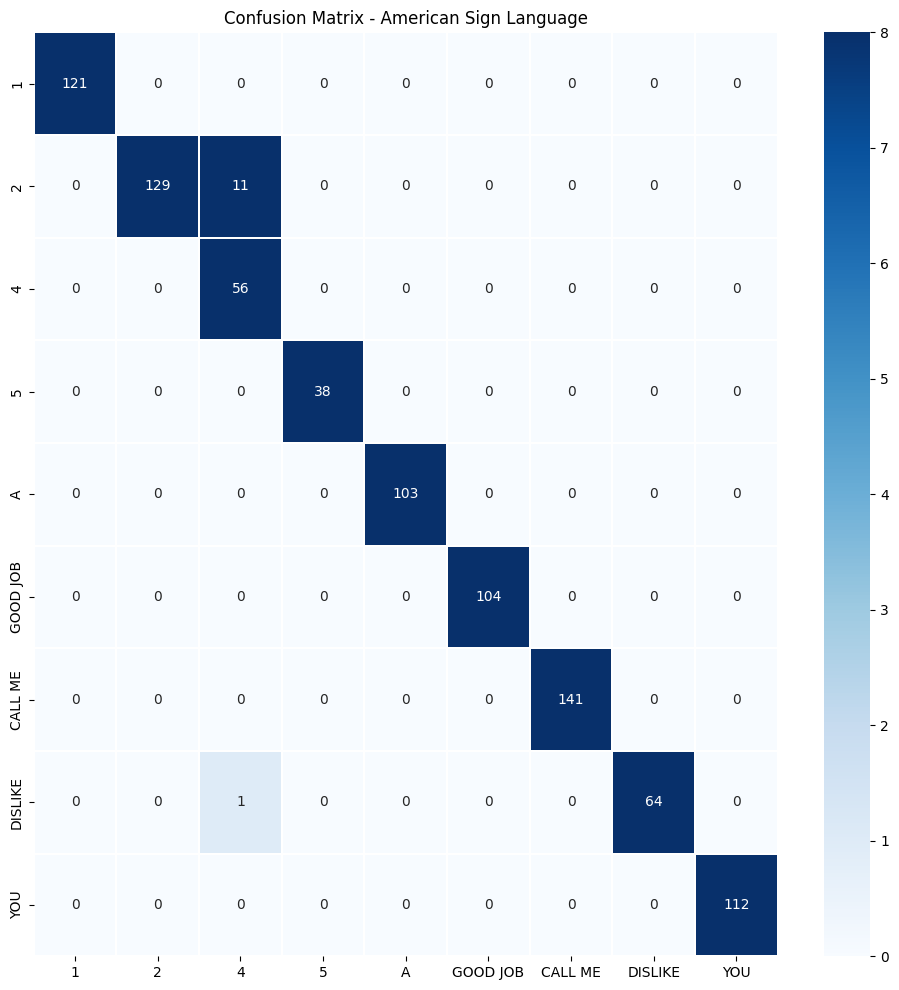

In [30]:
labels = sorted(list(set(df['Output'])))
labels = [str(x).upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [31]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)

C:\Users\bhuvana\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


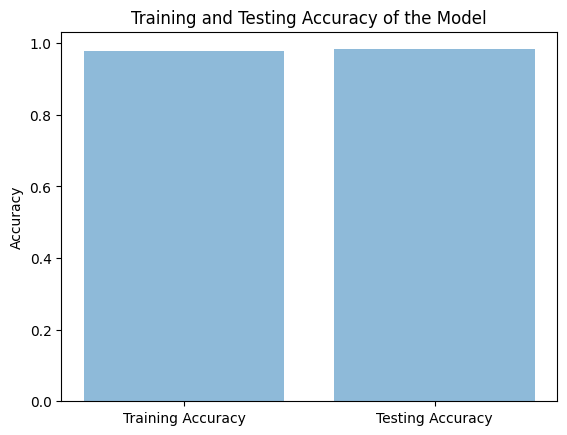

In [32]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression




# train a logistic regression model on the training data
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# evaluate the model on the training and testing data
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

# plot the training and testing accuracy as a bar graph
accuracy = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']
x_pos = np.arange(len(labels))

plt.bar(x_pos, accuracy, align='center', alpha=0.5)
plt.xticks(x_pos, labels)
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of the Model')
plt.show()


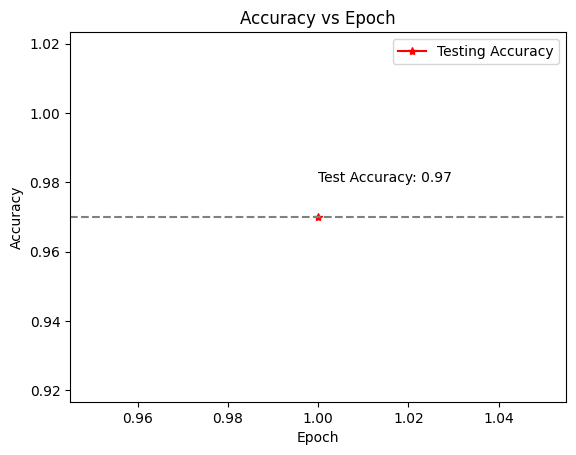

In [33]:
test_acc = 0.97

# create a list of epochs (x-axis)
epochs = list(range(1, 2))

# plot the training and validation accuracy vs epoch
plt.plot(epochs, [test_acc], 'r*-', label='Testing Accuracy')

# add labels and legend to the plot
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# add a horizontal line to indicate the maximum test accuracy achieved
plt.axhline(y=test_acc, color='gray', linestyle='--', label='Test Accuracy')
plt.text(1, test_acc+0.01, f'Test Accuracy: {test_acc:.2f}')

# show the plot
plt.show()







